In [1]:
import osmnx as ox

In [2]:
G_krakow_big = ox.graph_from_address("Krakow", dist=30000, dist_type="bbox", network_type="all", simplify=False)

In [3]:
print(G_krakow_big)

MultiDiGraph with 1056447 nodes and 2210978 edges


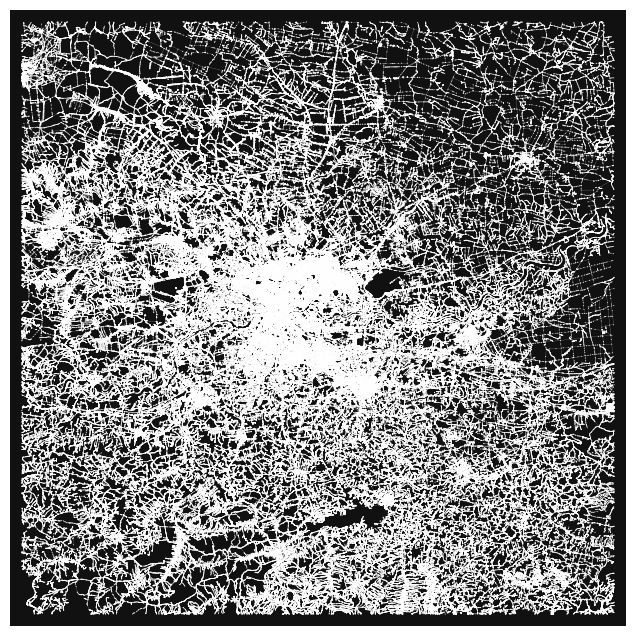

In [4]:
fig, ax = ox.plot_graph(G_krakow_big, node_size=0.5, edge_linewidth=0.1)

In [7]:
G_krakow = ox.graph_from_place("Kraków", network_type="all", simplify=False)

In [8]:
print(G_krakow)

MultiDiGraph with 333120 nodes and 721628 edges


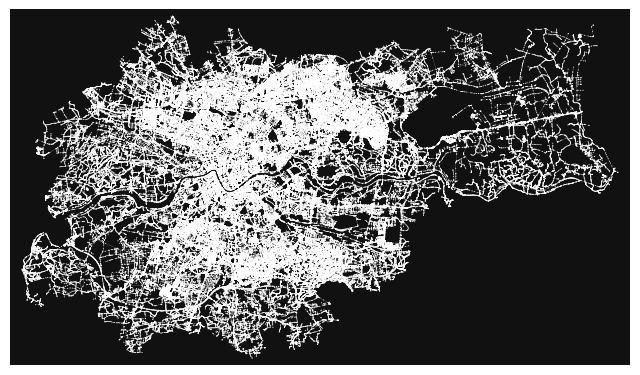

In [10]:
fig, ax = ox.plot_graph(G_krakow, node_size=0.5, edge_linewidth=0.1)

In [15]:
# G_simplified = ox.simplify_graph(G)
# print(G_simplified)

MultiDiGraph with 37593 nodes and 95301 edges


### Save chosen graph

In [11]:
ox.save_graphml(G_krakow_big, "./data/krakow_big.graphml")

In [12]:
ox.save_graphml(G_krakow, "./data/krakow.graphml")

In [21]:
# ox.settings.all_oneway = True
# G_all_oneway = ox.graph_from_place("Lisboa", network_type="all", simplify=True)
# ox.save_graph_xml(G_all_oneway, filepath="./data/lisboa.osm")